<ipython-input-8-5f67365183da>:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


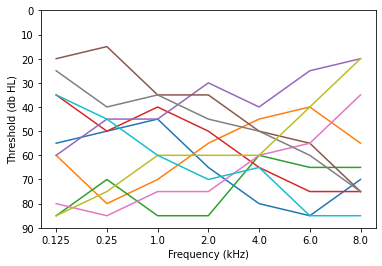

In [8]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy 
import matplotlib.ticker as ticker

#definir des limits pour chaque audiogrammes random
def nextRandomValue(previousThreshold):
    diffmax=25
    lowerLimit=max(0, previousThreshold - diffmax)
    upperLimit=min(90, previousThreshold + diffmax)
    nextValue = random.randrange(lowerLimit, upperLimit, 5) #multplie de 5

    return nextValue
    
#definir un nouvel audiogramme random d'intensite 0 jusqu'au 90
def nouvelAudiogram():
# On trouve la premiere valeur
    previous = random.randrange(0, 90, 5)
    audiogram = []
    audiogram.append(previous)
    # On trouve les autres valeurs
    for cpt in range(6):
        nextValue = nextRandomValue(previous)
        audiogram.append(nextValue)
        previous = nextValue
     
    return(audiogram)
    

def differenceEntreDeuxAudiogrammes(audio1, audio2):
    scoreDif = 0
    # On calcule un score de différence basé sur la corrélation
    matrice = ((numpy.corrcoef(audio1, audio2)*(-1)) + 1) * 50
    scoreDif = matrice[0,1]
    return(scoreDif)
    

# Fonction creerAudiogrammeDifferent(dfAudiogrammes, nbAudiogrammesRandom)
# Crée un nouvel audiogramme très différent des audiogrammes présents dans dfAudiogrammes
# Pour cela, il génère nbAudiogrammesRandom audiogrammes random
# et retourne l'audiogramme le plus différent de tous les audiogrammes présents dans dfAudiogrammes
def creerAudiogrammeDifferent (dfAudiogrammes, nbAudiogrammesRandomToUse):
    # Créer une df temporaire pour mettre les audiogrammes random
    dfAudiogrammesTemp=pd.DataFrame() 
    # Crée nbAudiogrammesRandom audiogrammes random et les insère dans la df temporaire
    # Trouver nbRandomAudiograms audiogrammes random
    for i in range(nbAudiogrammesRandomToUse):
        # on crée un audiogramme random
        audioRandom=nouvelAudiogram()
        # Using DataFrame.insert() to add a column 
        dfAudiogrammesTemp.insert(i, str(i), audioRandom, True) 
    #print(dfAudiogrammesTemp)
    # Pour chacun des audiogrammes random, calcul de la différence moyenne avec tous les audiogrammes présents dans dfAudiogrammes
    dfDifferences  = pd.DataFrame()

    
    # On calcule les differences entre chaque audiogramme random et chaque audiogramme de dfFinale
    for i in list (dfAudiogrammesTemp):
        for j in list (dfAudiogrammes):
            difference = differenceEntreDeuxAudiogrammes(dfAudiogrammesTemp.loc[:,i], dfAudiogrammes.loc[:,j])
            dfDifferences.loc[i,j] = difference
            
    # On ajoute les moyennes
    dfDifferences['mean'] = dfDifferences.mean(axis=1)

    # Trouver l'audiogramme random le plus différent de tous les audiogrammes présents dans dfAudiogrammes
    # Retourner cet audiogramme
    #f.write(str(len(dfAudiogrammes.columns)) + "," + str(dfDifferences['mean'].max()))
    audiogramme = dfAudiogrammesTemp[dfDifferences['mean'].idxmax()]
    return audiogramme
    
    
# BOUCLE GENERALE
# On définit le nombre d'audiogrammes très différents qu'on veut
nbRandomAudiogramsWeWant = 10

# On définit le nombre d'audiogrammes random à utiliser pour trouver chaque audiogramme très différent
nbRandomAudiogramsToUse = 100

# On écrit le mode de calcul de différence qu'on veut
#modeDifference = "correlation"
#modeDifference = "niveau"
#modeDifference = "correlationEtNiveau"

# On crée la base dfFinale avec un premier audiogramme random
# Génération du premier audiogramme
dfFinale=pd.DataFrame(nouvelAudiogram())
#print(dfFinale) 

#f = open("diffcorr.csv", "w")
for i in range (nbRandomAudiogramsWeWant-1):
    audiogrammeNouveau = creerAudiogrammeDifferent(dfFinale,nbRandomAudiogramsToUse)
    #print(audiogrammeNouveau)
    dfFinale.append(audiogrammeNouveau)
    dfFinale.insert(i + 1, str(i + 1), audiogrammeNouveau, True) 
    
#f.close()



#tracer le plot de dfFinale

plt.xlabel('Frequency (kHz)')
plt.ylabel('Threshold (db HL)')
name_list = ('0.125','0.25','1.0','2.0','4.0','6.0','8.0')
pos_list = numpy.arange(len(name_list))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
plt.plot(dfFinale)
plt.ylim(90,0)
plt.show() 

dfFinale.index = [0.125,0.25,0.5,1.0,2.0,4.0,8.0]
#sauveagrder les donnees finale en csv
dfFinale_save=dfFinale.to_csv('dfFinale.csv') 

In [7]:
%run Audiograms.py 100 100 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

enregistement les audiogrammes


In [8]:
%run Audiograms.py 200 100 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

enregistement les audiogrammes


/Users/Aynaz/Documents/aynaz/Audiograms.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  #ax = plt.axes() #definir les axes de plot a tracer


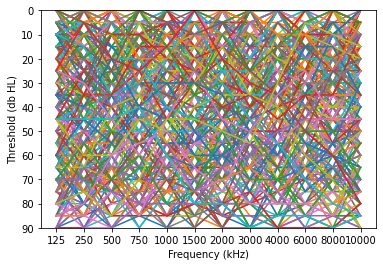

None


In [11]:
%run Audiograms.py 300 100 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

In [2]:
%run Audiograms.py 1001 100 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

KeyboardInterrupt: 

/Users/Aynaz/Documents/aynaz/Audiograms.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  #ax = plt.axes() #definir les axes de plot a tracer


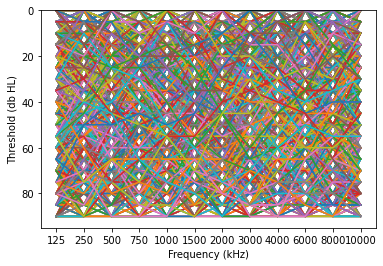

None


In [14]:
%run Audiograms.py 1500 100 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

In [1]:
50*100

5000

In [238]:
%run Audiograms.py 50 50 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 4
audiogramme 5
audiogramme 6
audiogramme 7
audiogramme 8
audiogramme 9
audiogramme 10
audiogramme 11
audiogramme 12
audiogramme 13
audiogramme 14
audiogramme 15
audiogramme 16
audiogramme 17
audiogramme 18
audiogramme 19
audiogramme 20
audiogramme 21
audiogramme 22
audiogramme 23
audiogramme 24
audiogramme 25
audiogramme 26
audiogramme 27
audiogramme 28
audiogramme 29
audiogramme 30
audiogramme 31
audiogramme 32
audiogramme 33
audiogramme 34
audiogramme 35
audiogramme 36
audiogramme 37
audiogramme 38
audiogramme 39
audiogramme 40
audiogramme 41
audiogramme 42
audiogramme 43
audiogramme 44
audiogramme 45
audiogramme 46
audiogramme 47
audiogramme 48
audiogramme 49
audiogramme 50
audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 4
audiogramme 5
audiogramme 6
audiogramme 7
audiogramme 8
audiogramme 9
audiogramme 10
audiogramme 11
audiogramme 12
audiogramme 13
audiogramme 14
audiogramme 15
audiogramme 16
audiogramme 17
audiogramme 1

In [254]:
df = pd.read_csv('df5000.csv' , sep=',' , header=None)
df.loc[-1] = df.columns.values
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.iloc[1:]
df=df.drop([df.columns[0]], axis=1)
df=df.rename({"1": "s125", "2": "s250", "3": "s500", "4": "s750", "5": "s1000","6": "s1500", "7": "s2000", "8": "s3000", "9": "s4000", "10": "s6000","11": "s8000", "12": "s10000"},axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,5,10,10,15,10,25,0,0,20,25,15,25
2,85,60,50,45,45,35,45,45,40,15,15,25
3,0,0,15,0,5,10,30,45,25,10,30,5
4,35,50,60,35,55,45,30,10,5,20,25,30
5,25,30,15,35,30,45,65,80,70,60,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...
5096,45,55,60,80,85,90,80,55,35,10,5,25
5097,25,0,20,15,0,20,5,10,10,20,35,10
5098,5,15,10,25,20,10,30,5,15,25,15,35
5099,25,15,0,5,5,10,0,5,25,0,0,0


In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy 
import matplotlib.ticker as ticker
df = pd.read_csv('df5000.csv' , sep=',' , header=None)
df.loc[-1] = df.columns.values
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.iloc[1:]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,5,10,10,15,10,25,0,0,20,25,15,25
2,1,85,60,50,45,45,35,45,45,40,15,15,25
3,2,0,0,15,0,5,10,30,45,25,10,30,5
4,3,35,50,60,35,55,45,30,10,5,20,25,30
5,4,25,30,15,35,30,45,65,80,70,60,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,46,45,55,60,80,85,90,80,55,35,10,5,25
5097,47,25,0,20,15,0,20,5,10,10,20,35,10
5098,48,5,15,10,25,20,10,30,5,15,25,15,35
5099,49,25,15,0,5,5,10,0,5,25,0,0,0


In [5]:
df.index = df.index -1
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,5,10,10,15,10,25,0,0,20,25,15,25
1,1,85,60,50,45,45,35,45,45,40,15,15,25
2,2,0,0,15,0,5,10,30,45,25,10,30,5
3,3,35,50,60,35,55,45,30,10,5,20,25,30
4,4,25,30,15,35,30,45,65,80,70,60,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,46,45,55,60,80,85,90,80,55,35,10,5,25
5096,47,25,0,20,15,0,20,5,10,10,20,35,10
5097,48,5,15,10,25,20,10,30,5,15,25,15,35
5098,49,25,15,0,5,5,10,0,5,25,0,0,0


In [7]:
df_fin=df.T

In [9]:
df_fin=df_fin.iloc[1:]
df_fin.index = df_fin.index -1
df_fin

,0,1,2,3,4,5,6,7,8,9,...,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099
0,5,85,0,35,25,60,10,60,40,90,...,30,70,10,40,35,45,25,5,25,5
1,10,60,0,50,30,45,10,75,40,75,...,50,65,15,30,40,55,0,15,15,15
2,10,50,15,60,15,20,25,90,60,55,...,30,80,10,40,25,60,20,10,0,25
3,15,45,0,35,35,35,40,85,45,75,...,20,75,15,30,20,80,15,25,5,25
4,10,45,5,55,30,40,40,65,55,60,...,5,90,5,40,30,85,0,20,5,20
5,25,35,10,45,45,15,55,45,35,75,...,10,85,20,35,35,90,20,10,10,25
6,0,45,30,30,65,15,75,25,50,80,...,15,85,15,15,40,80,5,30,0,45
7,0,45,45,10,80,5,60,15,70,70,...,10,80,30,35,30,55,10,5,5,40
8,20,40,25,5,70,25,40,0,60,60,...,30,60,35,20,45,35,10,15,25,20
9,25,15,10,20,60,25,60,15,80,60,...,40,55,55,5,60,10,20,25,0,20


In [10]:
df_fin=df_fin.to_csv('df_fin.csv') 

In [ ]:
plt.xlabel('Frequency (kHz)')
plt.ylabel('Threshold (db HL)')
name_list = ('125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(name_list))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
plt.plot(df['mean_x'])
plt.ylim(95,0)
plt.show()

In [256]:
df.to_csv('df_final.csv') 

In [215]:
for i in range(3):
    %run Audiograms.py 3 50 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 1
audiogramme 2
audiogramme 3


In [202]:
lst=[]
for i in range(3):
    d=%run Audiograms.py 3 50 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000[i]
lst.append(d)
print(lst)

audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 1
audiogramme 2
audiogramme 3
[None]


In [113]:
%%timeit -n2 -r1 -o
%run Audiograms.py 3 50 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

audiogramme 1
audiogramme 2
audiogramme 3
audiogramme 1
audiogramme 2
audiogramme 3
382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


<TimeitResult : 382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)>

/Users/Aynaz/Documents/aynaz/Audiograms.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  #ax = plt.axes() #definir les axes de plot a tracer


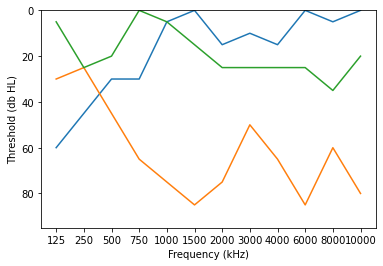

None


In [98]:
%run Audiograms.py 3 100 125,250,500,750,1000,1500,2000,3000,4000,6000,8000,10000

<ipython-input-99-1b962f6fd63b>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


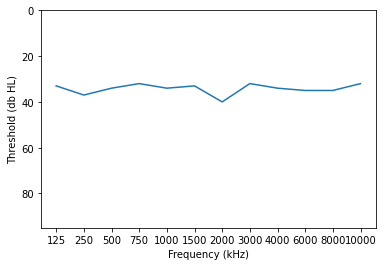

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('df.csv')
df.columns = ['y', 'x1','x2','x3']
x1=df.iloc[:,[1]]
x2=df.iloc[:,[2]]
x3=df.iloc[:,[3]]
#x4=df.iloc[:,[4]]
#x5=df.iloc[:,[5]]
mean_x = np.mean((x1,x2,x3,x4,x5), axis=0)
mean_x= pd.DataFrame(mean_x)
df = pd.concat([df, mean_x], axis=1)
df.columns = ['y', 'x1','x2','x3','mean_x']

plt.xlabel('Frequency (kHz)')
plt.ylabel('Threshold (db HL)')
name_list = ('125','250','500','750','1000','1500','2000','3000','4000','6000','8000','10000')
pos_list = numpy.arange(len(name_list))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
plt.plot(df['mean_x'])
plt.ylim(95,0)
plt.show()

In [73]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
f = lambda x, a: x**3 - a
fder = lambda x, a: 3 * x**2
np.random.seed(4321)
x = np.array(mean_x)
a = np.arange(100,10000)
vec_res = optimize.newton(f, x, fprime=fder, args=(a, ))
#The above is the equivalent of solving for each value in (x, a) separately in a for-loop, just faster:

loop_res = [optimize.newton(f, x0, fprime=fder, args=(a0,))
             for x0, a0 in zip(x, a)]
np.allclose(vec_res, loop_res)
#True
#Plot the results found for all values of a:

analytical_result = np.sign(a) * np.abs(a)**(5/3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a, analytical_result, 'o')
ax.plot(a, vec_res, '.')
ax.set_xlabel('$a$')
ax.set_ylabel('$x$ where $f(x, a)=0$')
plt.show()



IndexError: boolean index did not match indexed array along dimension 1; dimension is 9900 but corresponding boolean dimension is 1

In [75]:
x

array([[33.33333333],
       [26.66666667],
       [23.33333333],
       [25.        ],
       [28.33333333],
       [35.        ],
       [30.        ],
       [31.66666667],
       [35.        ],
       [35.        ],
       [33.33333333],
       [33.33333333]])

In [5]:
df4 = pd.read_csv('dfFinale4.csv' , sep=',' , header=None)

In [6]:
df4

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,NaN,0,1,2,3,4,5,6,7,8,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
1,125.0,0,90,40,90,60,20,10,70,10,...,75,40,55,35,30,0,75,80,55,55
2,250.0,0,65,55,90,65,20,15,60,15,...,50,60,45,30,35,15,70,70,75,40
3,500.0,10,40,75,75,55,20,30,40,10,...,50,80,25,45,10,0,90,75,65,45
4,750.0,15,20,90,75,70,10,30,35,5,...,45,75,20,65,20,0,90,50,75,65
5,1000.0,35,0,75,80,55,30,25,50,0,...,50,80,15,55,5,15,75,70,55,75
6,1500.0,55,5,65,85,70,10,10,60,5,...,45,65,25,55,0,35,65,80,70,80
7,2000.0,50,15,45,85,60,20,25,60,10,...,25,80,45,40,0,35,80,65,45,90
8,3000.0,25,35,50,75,75,0,45,40,15,...,10,70,60,35,15,10,85,85,30,75
9,4000.0,5,55,50,70,85,0,50,35,35,...,25,75,45,40,0,10,90,75,50,60


In [7]:
df4.columns = df4.iloc[0]
df4=pd.DataFrame(df4)
df4=df4.drop(df4.index[0])

In [15]:
df4.iloc[:,0]

1       125.0
2       250.0
3       500.0
4       750.0
5      1000.0
6      1500.0
7      2000.0
8      3000.0
9      4000.0
10     6000.0
11     8000.0
12    10000.0
Name: nan, dtype: float64

In [8]:
df4

,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,1490.0,1491.0,1492.0,1493.0,1494.0,1495.0,1496.0,1497.0,1498.0,1499.0
1,125.0,0,90,40,90,60,20,10,70,10,...,75,40,55,35,30,0,75,80,55,55
2,250.0,0,65,55,90,65,20,15,60,15,...,50,60,45,30,35,15,70,70,75,40
3,500.0,10,40,75,75,55,20,30,40,10,...,50,80,25,45,10,0,90,75,65,45
4,750.0,15,20,90,75,70,10,30,35,5,...,45,75,20,65,20,0,90,50,75,65
5,1000.0,35,0,75,80,55,30,25,50,0,...,50,80,15,55,5,15,75,70,55,75
6,1500.0,55,5,65,85,70,10,10,60,5,...,45,65,25,55,0,35,65,80,70,80
7,2000.0,50,15,45,85,60,20,25,60,10,...,25,80,45,40,0,35,80,65,45,90
8,3000.0,25,35,50,75,75,0,45,40,15,...,10,70,60,35,15,10,85,85,30,75
9,4000.0,5,55,50,70,85,0,50,35,35,...,25,75,45,40,0,10,90,75,50,60
10,6000.0,20,65,70,60,70,10,45,20,35,...,45,85,35,45,0,30,65,75,60,50


In [19]:
df4=df4.iloc[:, 0:1002]

In [20]:
df4.to_csv('audiogramme1000.csv') 